In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Load the Sample Dataset

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Sampling Techniques

### Sampling Random Sampling

In [ ]:
df.shape

(150, 5)

In [ ]:
df.sample(5,random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [11]:
n = int(input("Enter your sample : "))
print(n)

sample_data = df.sample(n, random_state=42)
print("Simple Radom Sampling : ")
sample_data

5
Simple Radom Sampling : 


,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


## Systematic Sampling

In [12]:
n = int(input("Enter your samples : "))
print()

sample_data = df.iloc[::n]
print("Systematic Sampling : ")
sample_data


Systematic Sampling : 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
50,7.0,3.2,4.7,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
80,5.5,2.4,3.8,1.1,versicolor
90,5.5,2.6,4.4,1.2,versicolor


## Startfied Sampling

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
strata = df.groupby('species')
strata

In [17]:
strata = df.groupby('species').apply(lambda x:x.sample(min(len(x), 3)))
strata

C:\Users\patid\AppData\Local\Temp\ipykernel_35124\3293239691.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata = df.groupby('species').apply(lambda x:x.sample(min(len(x), 3)))


sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     42            4.4          3.2           1.3          0.2   
           38            4.4          3.0           1.3          0.2   
           7             5.0          3.4           1.5          0.2   
versicolor 54            6.5          2.8           4.6          1.5   
           60            5.0          2.0           3.5          1.0   
           93            5.0          2.3           3.3          1.0   
virginica  119           6.0          2.2           5.0          1.5   
           135           7.7          3.0           6.1          2.3   
           145           6.7          3.0           5.2          2.3   

                   species  
species                     
setosa     42       setosa  
           38       setosa  
           7        setosa  
versicolor 54   versicolor  
           60   versicolor  
           93   versicolor  
virginica  119   virginica  
           135   virginica  
           145   virginica

In [18]:
strata = df.groupby('species', group_keys=False).apply(lambda x : x.sample(min(len(x), 3)))
strata

C:\Users\patid\AppData\Local\Temp\ipykernel_35124\979992236.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata = df.groupby('species', group_keys=False).apply(lambda x : x.sample(min(len(x), 3)))


,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
53,5.5,2.3,4.0,1.3,versicolor
60,5.0,2.0,3.5,1.0,versicolor
65,6.7,3.1,4.4,1.4,versicolor
132,6.4,2.8,5.6,2.2,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


## Cluster Sampling

In [19]:
clusters = df.species.unique()
clusters

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
clusters = df.species.unique()

data = pd.concat(df[df['species'] == i].sample(3) for i in np.random.choice(clusters, size=2, replace=False))
data

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
25,5.0,3.0,1.6,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa


# Quantiles - (Quartiles, Pentile, Decile, Percentile)

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
# Quartiles

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# Pentiles
df.describe(percentiles=[0.2,0.4,0.6,0.8,1.0])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
60%,6.100000,3.100000,4.640000,1.500000
80%,6.520000,3.400000,5.320000,1.900000
100%,7.900000,4.400000,6.900000,2.500000


In [25]:
df.describe(percentiles=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
30%,5.270000,2.800000,1.700000,0.400000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
60%,6.100000,3.100000,4.640000,1.500000


In [26]:
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [27]:
df['sepal_length'].quantile(0.25)

5.1

In [28]:
df['sepal_length'].quantile(0.5)

5.8

# Outlier Detection

## Using Boxplot

<Axes: >

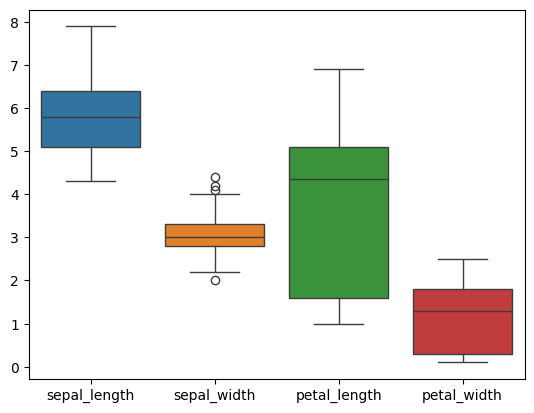

In [29]:
sns.boxplot(df)

<Axes: ylabel='sepal_width'>

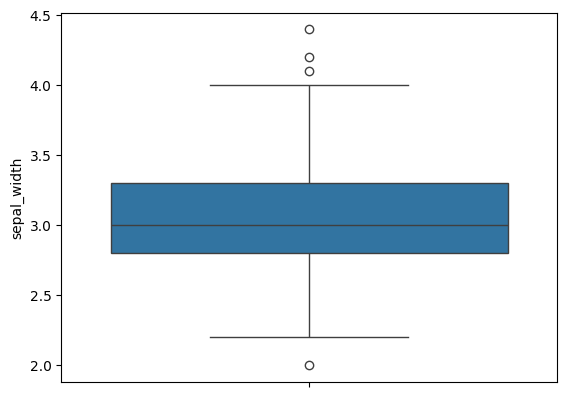

In [30]:
sns.boxplot(df['sepal_width'])

In [31]:
df[(df['sepal_width'] > 4.05) | df['sepal_width'] < 2.05]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Using IQR (Inter-Quartile Range)

In [34]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : {IQR}')

# Define Your Lower and Upper Limit

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = [x for x in df['sepal_width'] if x < lower_limit or x > upper_limit]

print(f"Lower limit for Outliers  : {lower_limit}")
print(f"Upper limit for Outliers  : {upper_limit}")
print(f"Identified Outliers  : {outliers}")

IQR : 0.5
Lower limit for Outliers  : 2.05
Upper limit for Outliers  : 4.05
Identified Outliers  : [4.4, 4.1, 4.2, 2.0]


In [35]:
print(Q1)
print(Q3)
print(IQR)

2.8
3.3
0.5


In [36]:
df[(df['sepal_width'] > 4.05) | (df['sepal_width']< 2.05)].index


Index([15, 32, 33, 60], dtype='int64')

In [37]:
df.shape

(150, 5)

In [38]:
df.drop(index = [15,32,33,60], axis=0, inplace=True)

In [39]:
df.shape

(146, 5)

<Axes: ylabel='sepal_length'>

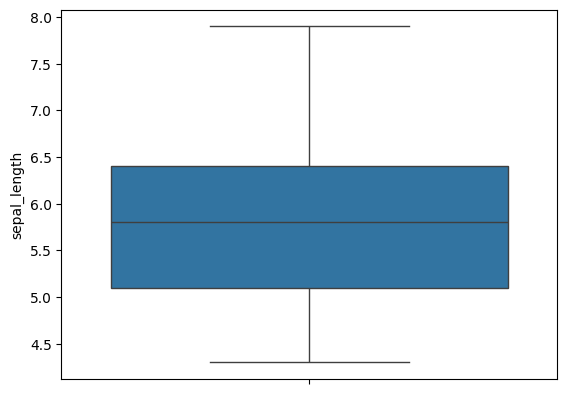

In [40]:
sns.boxplot(df['sepal_length'])

In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
